## Section 3:
You are provided with Distributed Acoustic Sensing data (Distributed acoustic sensing - Wikipedia). The fiber cable is stuck to the outside of a pipe which goes down to the earth for a couple of kilometers. Inside the pipe is liquid flow. 

Spatial discretization is 1m (each row in the dataset corresponds to a specific depth) and temporal resolution is 1 minute (each column in the well corresponds to a minute).

Your task is to implement some coding with further interpretations/observations of results:

- Brief description of Distributed Acoustic Sensing (DAS) working principle and cases of its applications
- Do data observations: some statistical analysis to get to know your data as well as various types of visualizations and insights from them
- Implement at least one algorithm (coding in Python, MATLAB, etc.) for line detection in the given signal using spatiotemporal data. Implementation of an additional algorithm and its comparison with the first one is highly welcomed
- Describe properties of the lines in case they are detected (algorithmically)

Eventually, you need to prepare slides and present your results where you show the workflow of your project in detail as well as how algorithms work.

You can access the datasets via this [link](Section 3 data file).

Note: The abovementioned things are a minimum program to be done. Feel free to explore beyond!


Distributed Acoustic Sensing (DAS) is a technology that utilizes fiber optic cables to detect acoustic signals. The working principle of DAS involves sending a pulse of light down the fiber optic cable and analyzing the backscattered signals. 

When external disturbances such as sound, vibration, or pressure occur, they cause strain or stress on the fiber, resulting in changes in the backscattered light. By analyzing these changes, DAS can detect vibrations or movements along the length of the fiber with high spatial resolutions.

One of the key advantages of DAS is its ability to provide continuous, real-time data over long distances. It can monitor and measure small changes in the environment around the fiber, making it suitable for various applications such as pipeline monitoring, seismic monitoring, and perimeter security.

Eventually, DAS offers a unique and effective way to detect and analyze acoustic signals using fiber optic cables, providing valuable insights into the surrounding environment.

In [1]:
import pandas as pd

data_original = pd.read_csv('Section 3 data.csv')

data_original.columns = range(0, data_original.columns.size)

data_statistics = data_original.describe()
print(data_statistics)


                0            1            2            3            4   \
count  4653.000000  4653.000000  4653.000000  4653.000000  4653.000000   
mean      4.752868     4.747885     4.829078     4.897856     4.950687   
std       6.090655     6.087824     6.235408     6.312660     7.158552   
min       0.544619     0.560788     0.552840     0.505436     0.530923   
25%       1.385173     1.342741     1.414165     1.398196     1.404133   
50%       2.402526     2.351952     2.432117     2.381935     2.362599   
75%       5.200344     5.236828     5.148625     5.367506     5.336435   
max      70.807121    55.407410    47.104305    48.785011    80.458168   

                5            6            7            8            9   ...  \
count  4653.000000  4653.000000  4653.000000  4653.000000  4653.000000  ...   
mean      4.636541     4.686629     4.816176     4.563740     4.609075  ...   
std       5.529075     5.977091     7.142968     5.366797     5.395040  ...   
min       0.56521

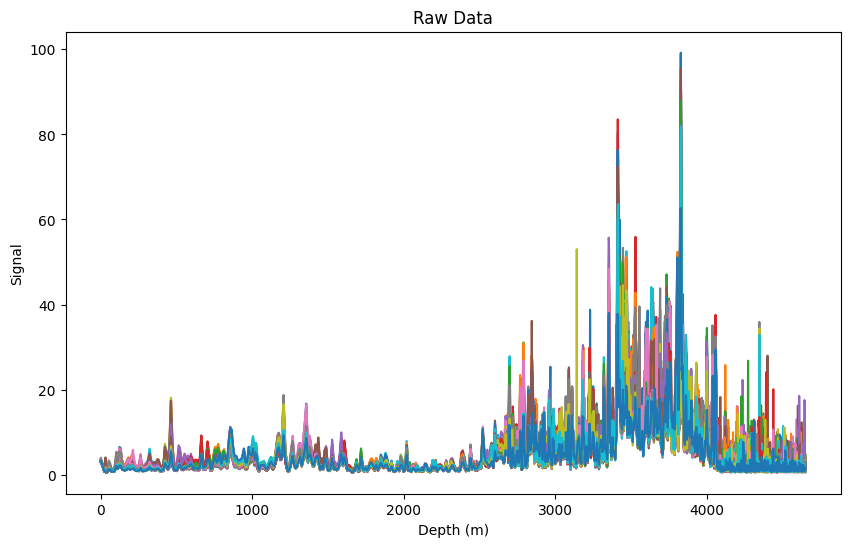

In [2]:
import matplotlib.pyplot as plt


# Visualizations
# Plot raw data
plt.figure(figsize=(10, 6))
plt.plot(data_original)
plt.title('Raw Data')
plt.xlabel('Depth (m)')
plt.ylabel('Signal')
plt.show()

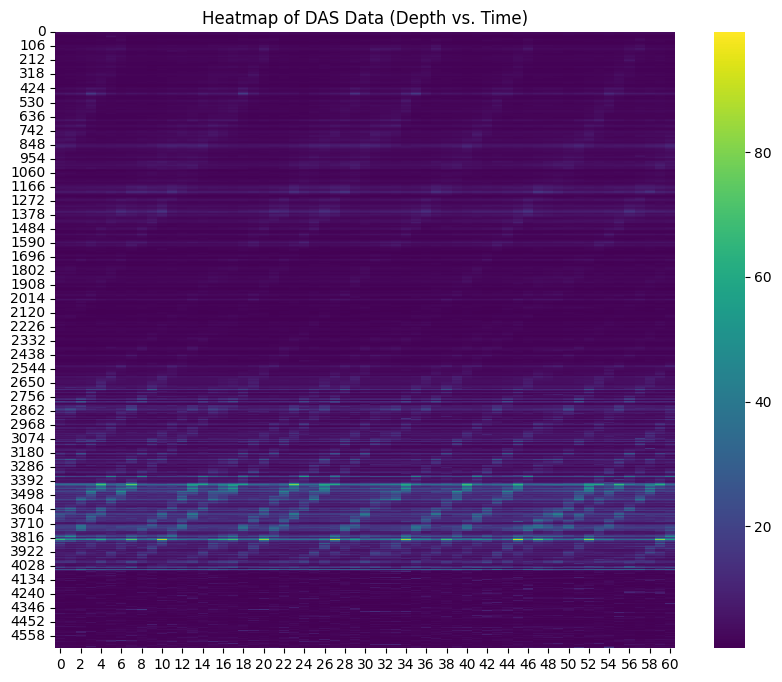

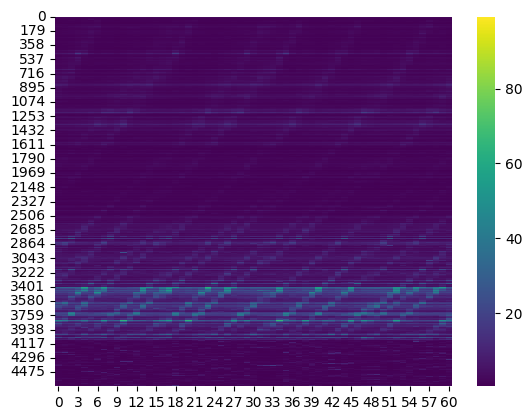

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a heatmap of the dataset
plt.figure(figsize=(10, 8))
sns.heatmap(data_original, cmap='viridis')
plt.title('Heatmap of DAS Data (Depth vs. Time)')
plt.show()

heatmap = sns.heatmap(data_original, cmap='viridis')

#saving the heatmap
heatmap.get_figure().savefig('heatmap.png')


In [51]:
import cv2
import numpy as np

# the heatmap image
heatmap = cv2.imread('heatmap.png', cv2.IMREAD_GRAYSCALE)

# edge detection (Canny algorithm)
edges = cv2.Canny(heatmap, 30, 150, apertureSize=3)

In [52]:
# Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

# the detected lines on the original heatmap
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(heatmap, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Saving the result
cv2.imwrite('heatmap_with_lines.png', heatmap)

True

In [45]:
# slope, intercept , angle and length of the lines
for line in lines:
    x1, y1, x2, y2 = line[0]
    slope = (y2-y1)/(x2-x1)
    intercept = y1 - slope*x1
    angle = np.arctan(slope)
    length = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    print(f"Line: ({x1},{y1}) - ({x2},{y2}), slope: {slope}, intercept: {intercept}, angle: {angle}, length: {length}")

Line: (80,95) - (476,95), slope: 0.0, intercept: 95.0, angle: 0.0, length: 396.0
Line: (80,374) - (476,374), slope: 0.0, intercept: 374.0, angle: 0.0, length: 396.0
Line: (80,93) - (476,93), slope: 0.0, intercept: 93.0, angle: 0.0, length: 396.0
Line: (80,291) - (476,291), slope: 0.0, intercept: 291.0, angle: 0.0, length: 396.0
Line: (80,152) - (476,152), slope: 0.0, intercept: 152.0, angle: 0.0, length: 396.0
Line: (62,58) - (476,58), slope: 0.0, intercept: 58.0, angle: 0.0, length: 414.0
Line: (249,353) - (476,353), slope: 0.0, intercept: 353.0, angle: 0.0, length: 227.0
Line: (80,154) - (476,154), slope: 0.0, intercept: 154.0, angle: 0.0, length: 396.0
Line: (80,360) - (476,360), slope: 0.0, intercept: 360.0, angle: 0.0, length: 396.0
Line: (105,149) - (476,149), slope: 0.0, intercept: 149.0, angle: 0.0, length: 371.0
Line: (80,164) - (476,164), slope: 0.0, intercept: 164.0, angle: 0.0, length: 396.0
Line: (519,426) - (519,58), slope: -inf, intercept: inf, angle: -1.5707963267948966

C:\Users\Murad\AppData\Local\Temp\ipykernel_24536\3092915795.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  slope = (y2-y1)/(x2-x1)


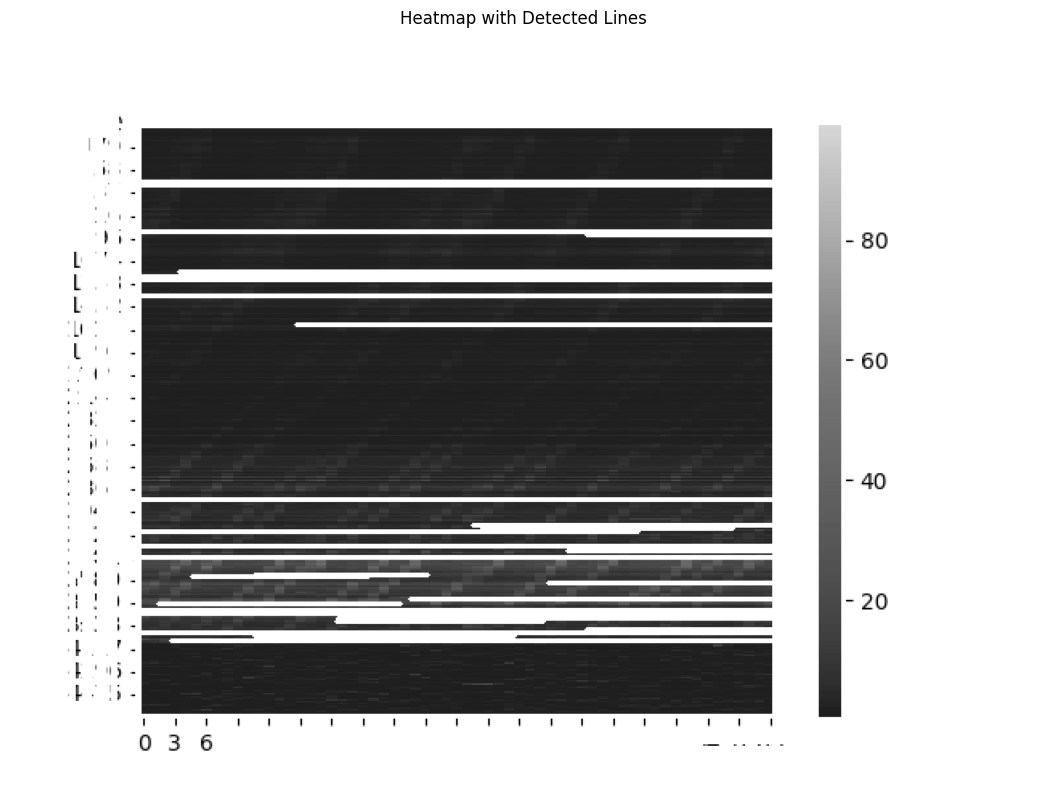

In [50]:
import matplotlib.pyplot as plt

# Displaying the result with size 10x10
plt.figure(figsize=(30, 10))
plt.imshow(heatmap, cmap='gray')
plt.axis('off')
plt.title('Heatmap with Detected Lines')
plt.show()

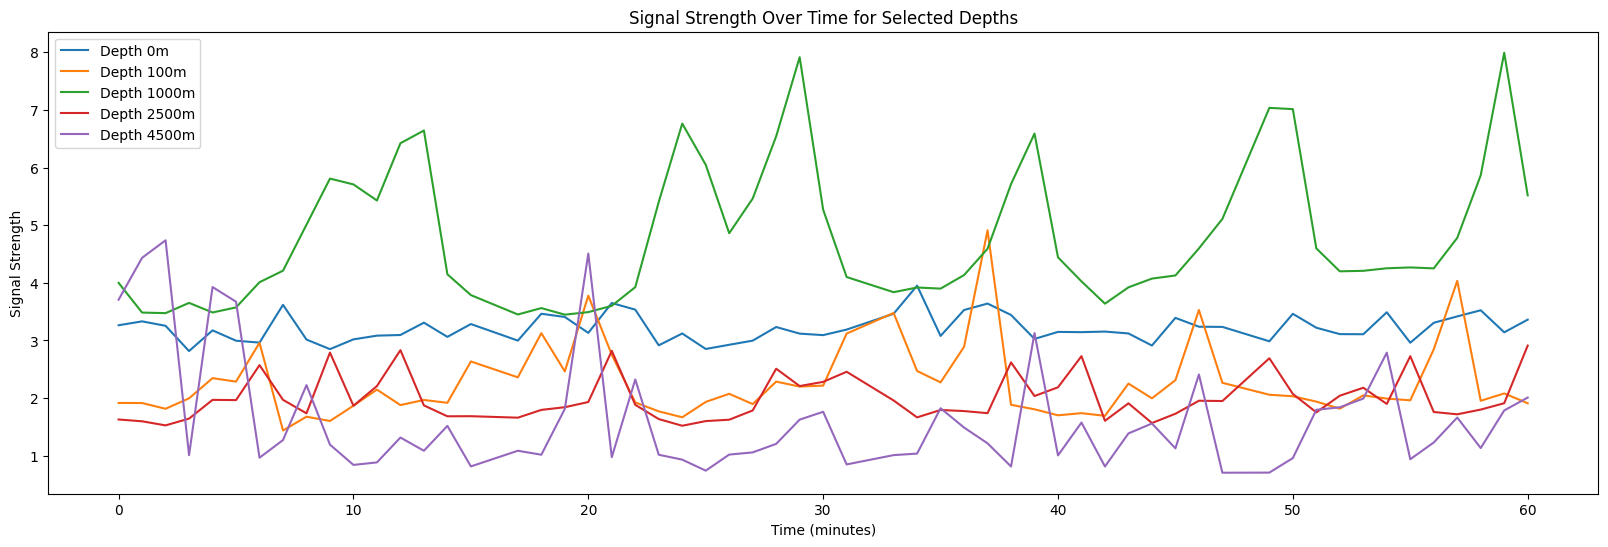

In [8]:
# Plot of signals at specific depths over time
depths_to_plot = [0, 100, 1000, 2500, 4500]  # some depths of interest
plt.figure(figsize=(20, 6))

for depth in depths_to_plot:
    plt.plot(data_original.iloc[depth], label=f'Depth {depth}m')

plt.title('Signal Strength Over Time for Selected Depths')
plt.xlabel('Time (minutes)')
plt.ylabel('Signal Strength')
plt.legend()
plt.show()


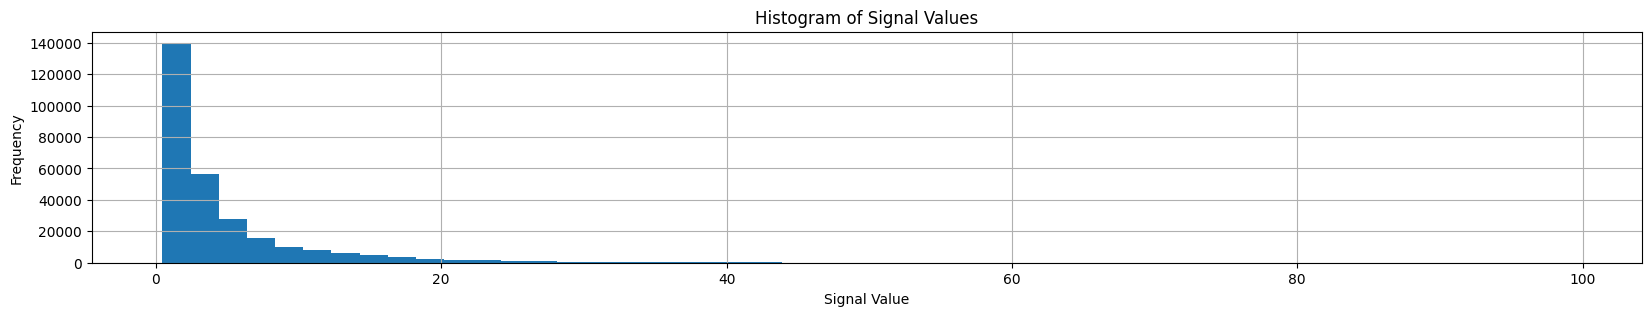

In [10]:
# We are converting the numpy array to a pandas DataFrame in order to use the stack method
data_df = pd.DataFrame(data_original)

# Plotting histogram of the values
data_df.stack().hist(bins = 50, figsize=(20, 3))
plt.title('Histogram of Signal Values')
plt.xlabel('Signal Value')
plt.ylabel('Frequency')
plt.show()
